In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import sys
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

# Extraction

In [2]:
# Kedro Catalog
pm25_by_hour = catalog.load('pm25_by_hour')

2022-09-06 12:22:09,856 - kedro.io.data_catalog - INFO - Loading data from `pm25_by_hour` (CSVDataSet)...


In [3]:
# PM25 by Hour without Outliers
pm25_by_hour.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
0,2022-09-04 00:00:00-05:00,5.521739,7.274336,4.885965,8.637168,7.526786,8.830357,4.690265,0.053097,0.495413,0.275229,6.456140,1.046729,8.789474,2022,09/04/22,00:00:00,Sunday,September
1,2022-09-04 01:00:00-05:00,4.700000,7.243697,4.741667,7.915254,7.974790,7.591667,3.200000,0.050420,0.339130,0.087719,6.370690,1.025641,7.191667,2022,09/04/22,01:00:00,Sunday,September
2,2022-09-04 02:00:00-05:00,6.108333,6.478992,5.436975,7.798319,6.546218,6.941176,5.881356,0.508333,1.954955,1.266667,5.205128,2.100000,7.525000,2022,09/04/22,02:00:00,Sunday,September
3,2022-09-04 03:00:00-05:00,5.705882,6.457627,6.932203,8.093220,6.406780,6.601695,5.338983,0.085470,0.495495,0.288136,4.991453,1.305085,6.815126,2022,09/04/22,03:00:00,Sunday,September
4,2022-09-04 04:00:00-05:00,5.601695,6.681034,7.145299,9.290598,5.657895,6.035088,6.698276,0.000000,0.149123,0.000000,6.666667,0.949153,6.551724,2022,09/04/22,04:00:00,Sunday,September


# PM25 Movil 24 Hours

In [4]:
# Add DateTime string values to PM25 Data Sensors
def add_datetime_str_values(data_sensors):
    # Date value string
    data_sensors['DATE'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%x'))
    # Time value string
    data_sensors['TIME'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%T'))
    # Weekday value string
    data_sensors['WEEKDAY'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%A'))
    # Month value string
    data_sensors['MONTH'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%B'))
    # Year value string
    data_sensors['YEAR'] = data_sensors['DATETIME'].transform(lambda x: x.strftime('%Y'))
    
    return data_sensors

In [5]:
# Get data_sensors resample mean by movil 24h
def resample_pm25_movil_24h(data_sensors):
    pm25_movil_24h = {}
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    for current_datetime in data_sensors['DATETIME'].to_list():
        last_24h = current_datetime - timedelta(hours=24)
        pm25_last_24h = data_sensors[(data_sensors['DATETIME'] <= current_datetime) & (data_sensors['DATETIME'] > last_24h)].resample('D', on='DATETIME', origin='end').mean().reset_index()
        pm25_movil_24h[current_datetime.isoformat()] = pm25_last_24h
    pm25_movil_24h = pd.concat(list(pm25_movil_24h.values())).reset_index(drop=True)
    return add_datetime_str_values(pm25_movil_24h)

In [6]:
# Resample mean by Hour
pm25_movil_24h = resample_pm25_movil_24h(pm25_by_hour)
pm25_movil_24h.tail()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE,YEAR,DATE,TIME,WEEKDAY,MONTH
19,2022-09-04 19:00:00-05:00,8.297933,10.953616,6.97366,13.416280,10.605084,9.140068,7.069615,1.807089,5.132119,9.492048,9.591802,6.784204,9.563718,2022,09/04/22,19:00:00,Sunday,September
20,2022-09-04 20:00:00-05:00,8.916186,11.792159,6.97366,14.454658,11.291767,9.750428,7.035658,1.809174,5.117546,9.446704,9.954512,6.786401,10.084493,2022,09/04/22,20:00:00,Sunday,September
21,2022-09-04 21:00:00-05:00,9.493664,12.428552,6.97366,15.083869,12.282951,10.403331,7.050030,1.813218,5.121637,9.431644,10.173971,6.818401,10.775984,2022,09/04/22,21:00:00,Sunday,September
22,2022-09-04 22:00:00-05:00,9.893253,12.702476,6.97366,15.356084,12.933318,10.879583,7.146635,1.866724,5.284050,9.741118,10.251114,7.053691,11.256674,2022,09/04/22,22:00:00,Sunday,September
23,2022-09-04 23:00:00-05:00,10.256675,13.020907,6.97366,15.833413,13.432835,10.879583,7.213938,1.919017,5.448853,10.046777,10.288728,7.286368,11.841077,2022,09/04/22,23:00:00,Sunday,September


In [7]:
# Describe Data
pm25_movil_24h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,7.061400,8.456193,6.411184,10.380773,8.575285,8.150608,6.545985,1.114721,3.488519,6.126400,8.541993,4.686300,8.652777
std,1.514835,2.292431,0.702928,2.750118,2.173190,1.318346,1.083204,0.737396,1.951766,4.050369,1.462592,2.444686,1.313163
min,5.110870,6.478136,4.813816,8.110991,6.373570,6.705943,3.945133,0.051759,0.417272,0.181474,5.755853,1.036185,7.151072
25%,5.815277,6.777070,6.268622,8.381925,6.992638,7.022454,6.093558,0.196545,0.919272,0.600027,7.984675,1.412574,7.777896
50%,6.513559,7.129013,6.613962,8.595156,7.470926,7.716335,7.081246,1.442408,4.555654,8.500427,9.088948,5.946231,7.964705
75%,8.115847,10.470800,6.973660,12.801832,9.945265,8.836692,7.193213,1.803944,5.105022,9.435409,9.361934,6.775171,9.386990
max,10.256675,13.020907,6.973660,15.833413,13.432835,10.879583,7.534171,1.919017,5.448853,10.046777,10.288728,7.286368,11.841077


In [8]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

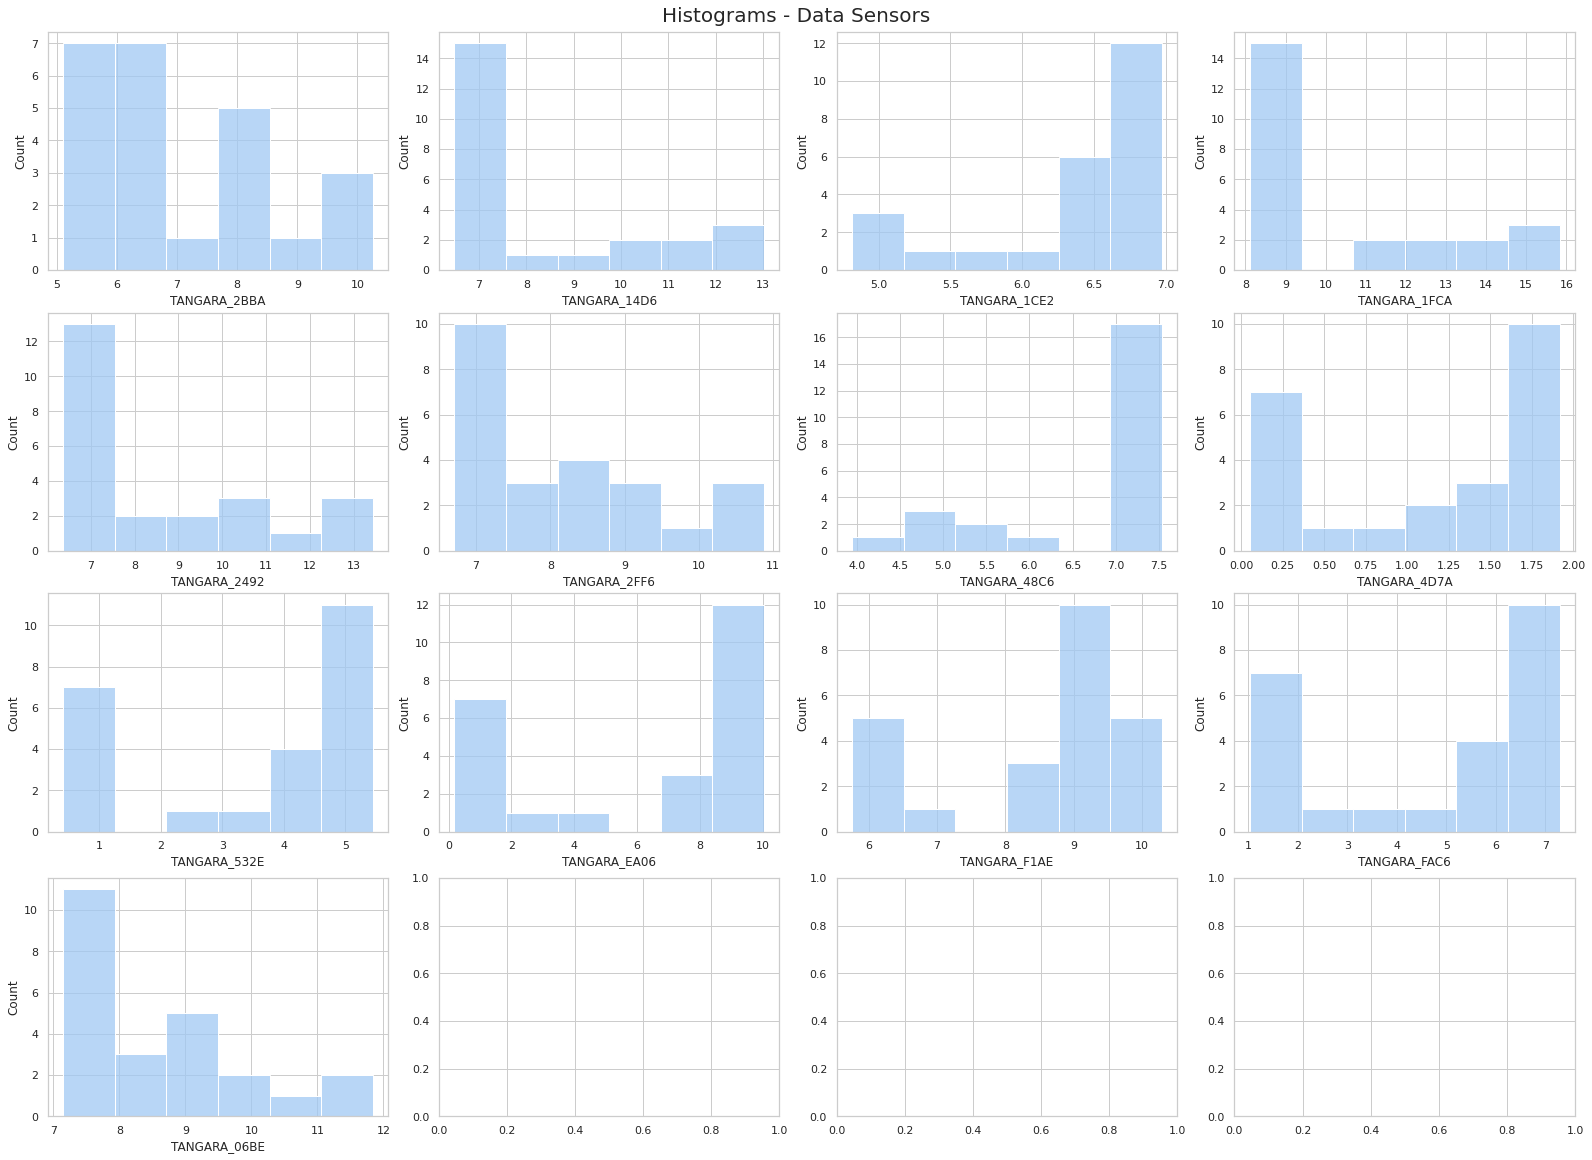

In [9]:
# Plot Histogramas
histplots(pm25_movil_24h)

In [10]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

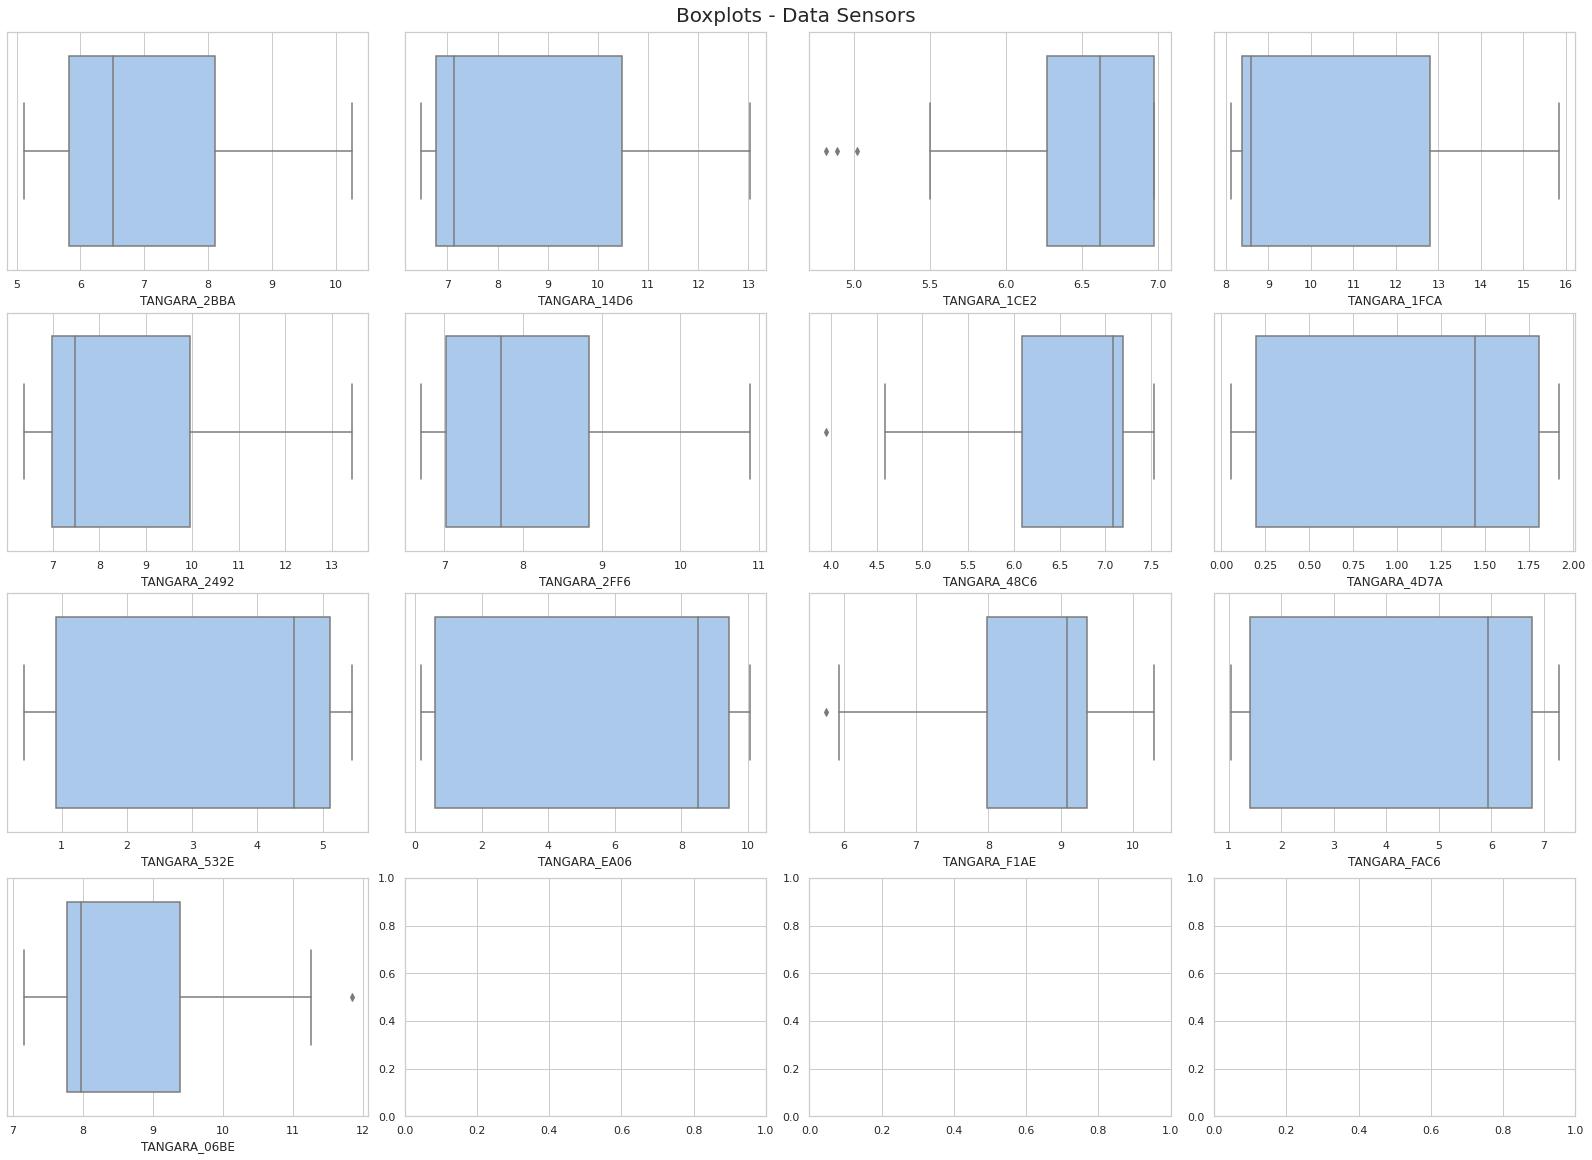

In [11]:
# Plot Boxplots
boxplots(pm25_movil_24h)

In [12]:
# Plot Lineplots
def lineplots(data_sensors):
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)

    fig.suptitle('Timeline - Data Sensors', fontsize=20)

    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.lineplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

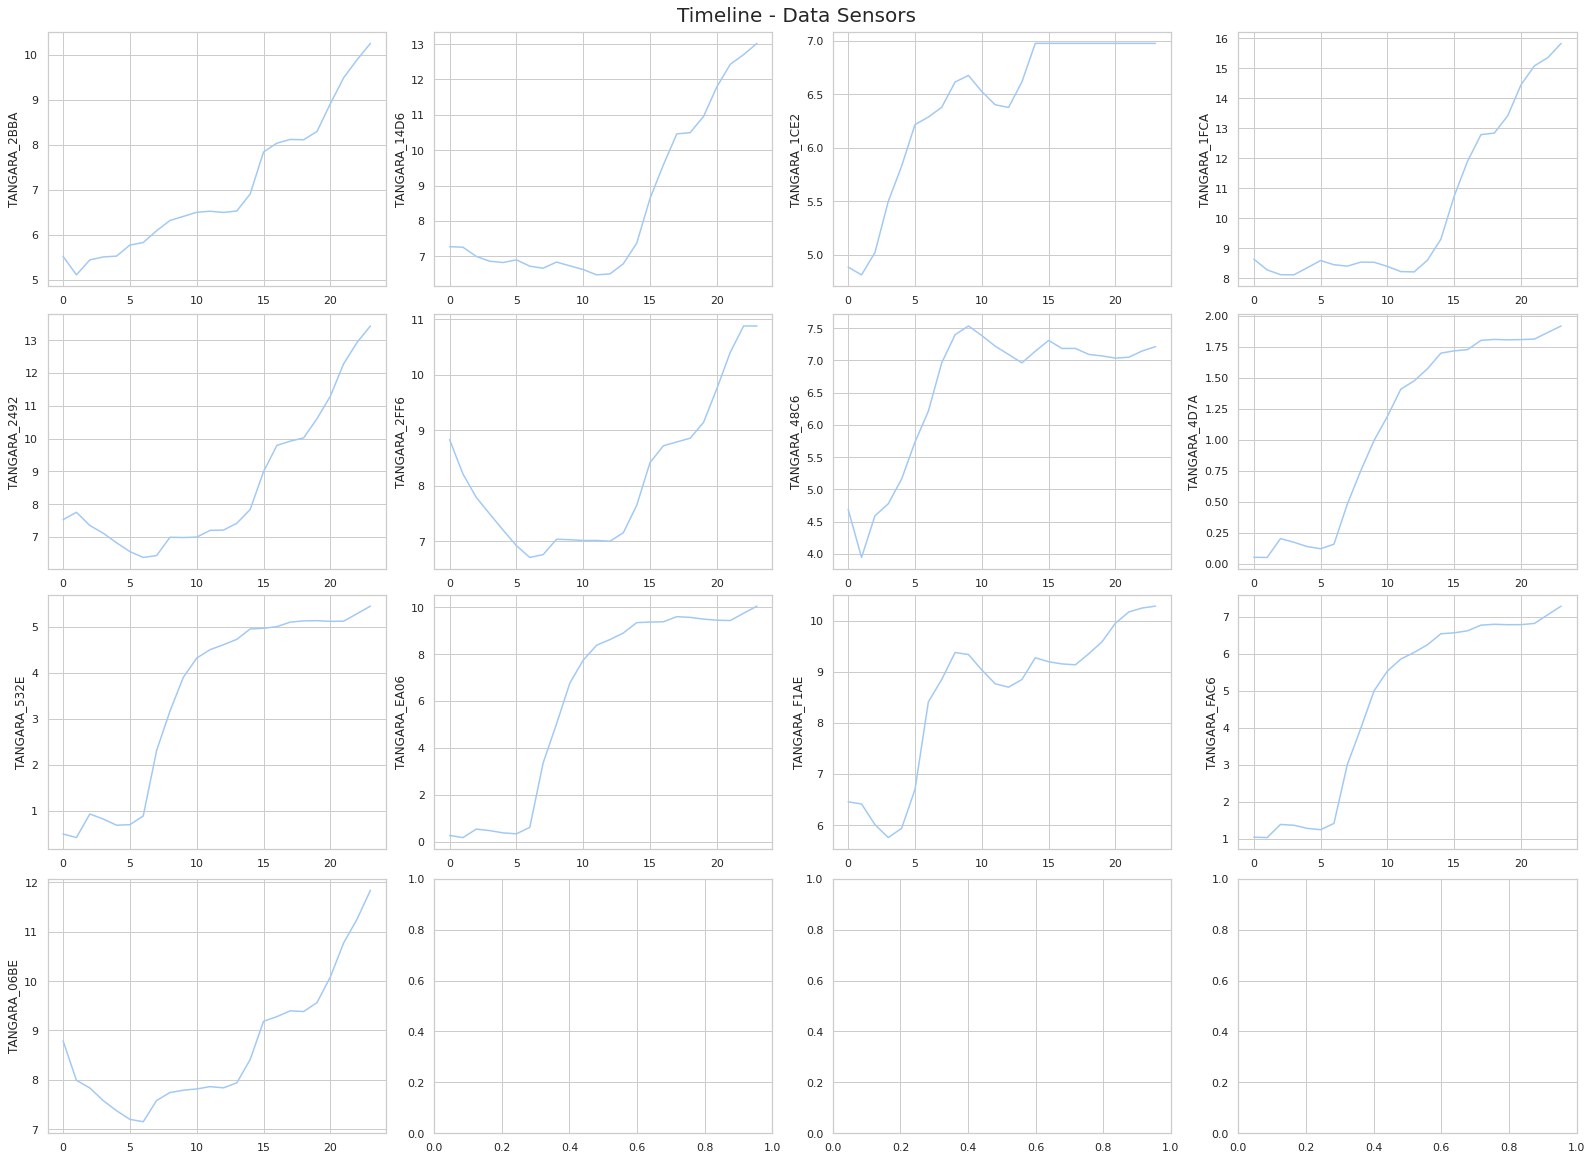

In [13]:
# Plot Lineplots
lineplots(pm25_movil_24h)

In [14]:
#pm25_by_hour[(pm25_by_hour['DATETIME'] <= '2022-09-04T23:59:59-05:00') & (pm25_by_hour['DATETIME'] > '2022-09-04T00:00:00-05:00')].resample('D', on='DATETIME', origin='end').mean().reset_index()

In [15]:
# Save pm25_movil_24h into Catalog
catalog.save('pm25_movil_24h', pm25_movil_24h)

2022-09-06 12:22:34,707 - kedro.io.data_catalog - INFO - Saving data to `pm25_movil_24h` (CSVDataSet)...
